In [26]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 6]

In [27]:
import re
from datetime import timedelta
def parse_line(lines):
    stats_regex = "\[(?P<epoch>[0-9]+)\] - (.*) - (\d+\.\d+),(\d+\.\d+),(\d+\.\d+)"
    stats_regex = re.compile(stats_regex)
    stats_match = stats_regex.findall(lines)
    
    time_regex = "\[([0-9]+)\] - (.*) - (\d\:\d+\:\d+\.\d+)"
    time_regex = re.compile(time_regex)
    time_match = time_regex.findall(lines)
    
    stats_matches = [(int(x[0]), x[1], float(x[2]), float(x[3]), float(x[4])) for x in stats_match]
    #time_matches = [(int(x[0]), x[1], float(x[2]), float(x[3])) for x in stats_match]

    return stats_matches, time_match

In [41]:
def plot_losses(filename):
    with open(filename) as f:
        file = f.read()
        
    stats, times = parse_line(file)
    train_stats = [x for x in stats if "train" in x[1]]
    train_times = [x for x in times if "train" in x[1]]
    
    eval_stats = [x for x in stats if "eval" in x[1]]
    eval_times = [x for x in times if "eval" in x[1]]
    
    plt.plot([x[0] for x in train_stats], [x[2] for x in train_stats])
    plt.plot([x[0] for x in eval_stats], [x[2] for x in eval_stats])
    plt.grid(True)
    plt.xlabel("Epoch")
    plt.ylabel("Top1 Accuracy")
    plt.show()

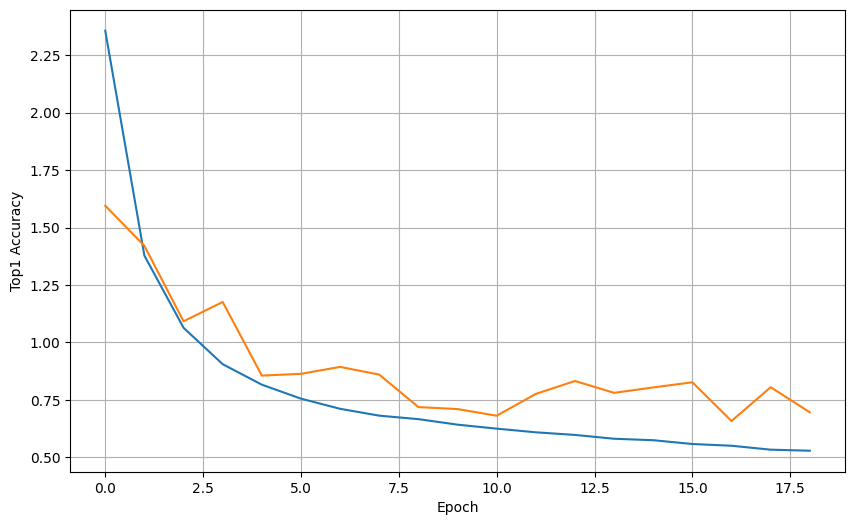

In [42]:
plot_losses("logs/norm_tests2/xsub_joints_none/training.log")

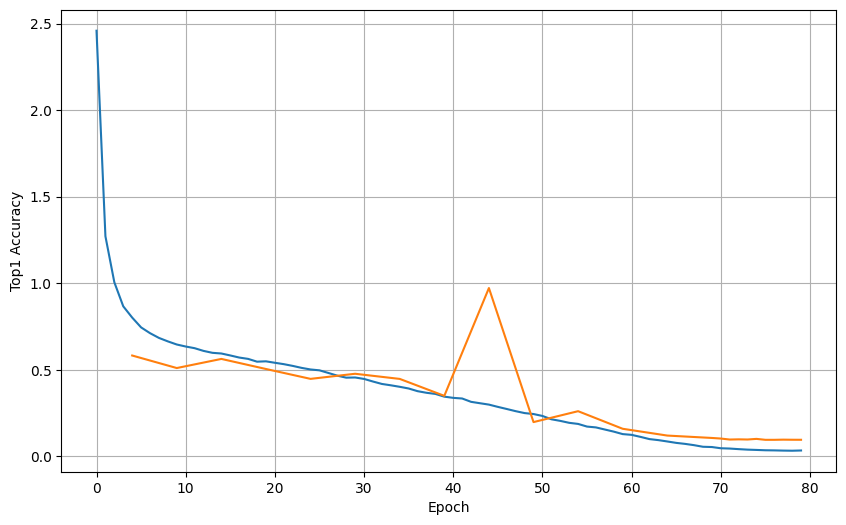

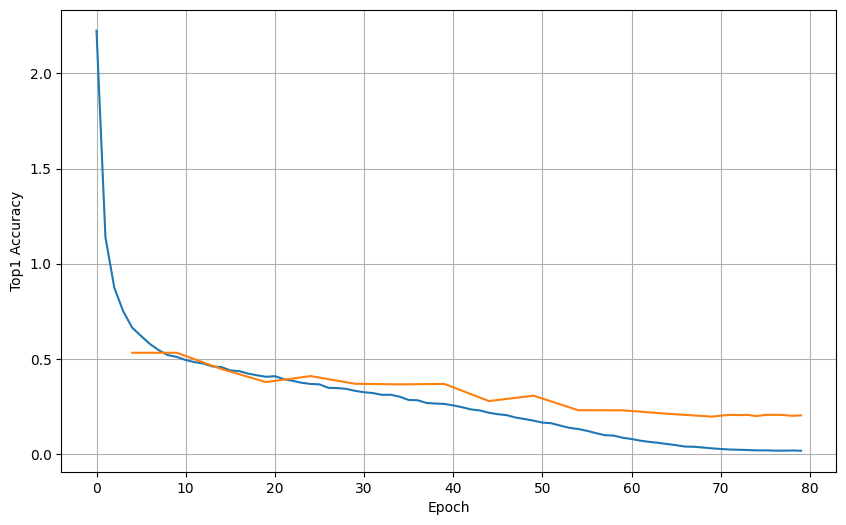

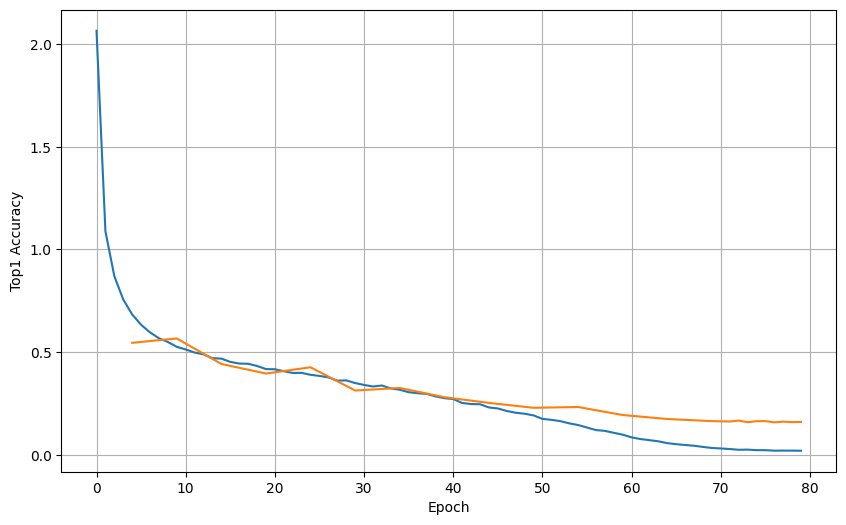

In [43]:
plot_losses("logs/xview_jo/training.log")
plot_losses("logs/xview_jore/training.log")
plot_losses("logs/xview_bo/training.log")

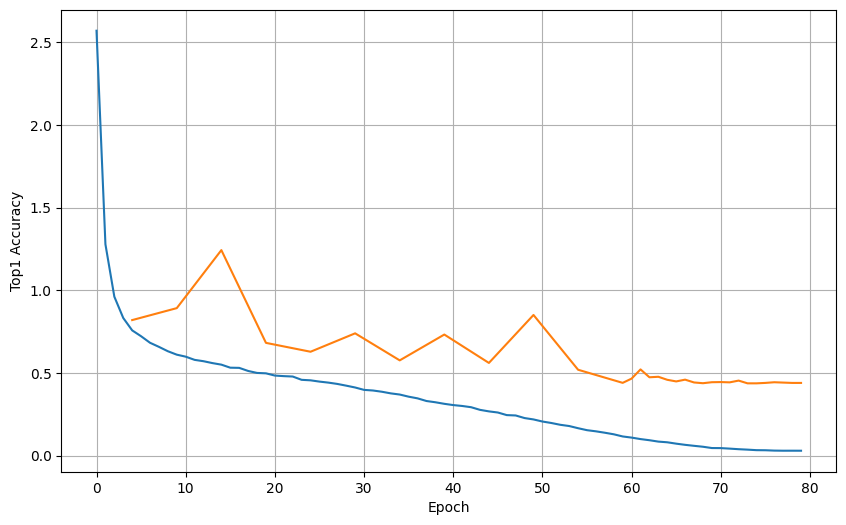

In [44]:
plot_losses("logs/norm_tests/xsub_joints_spine/training.log")

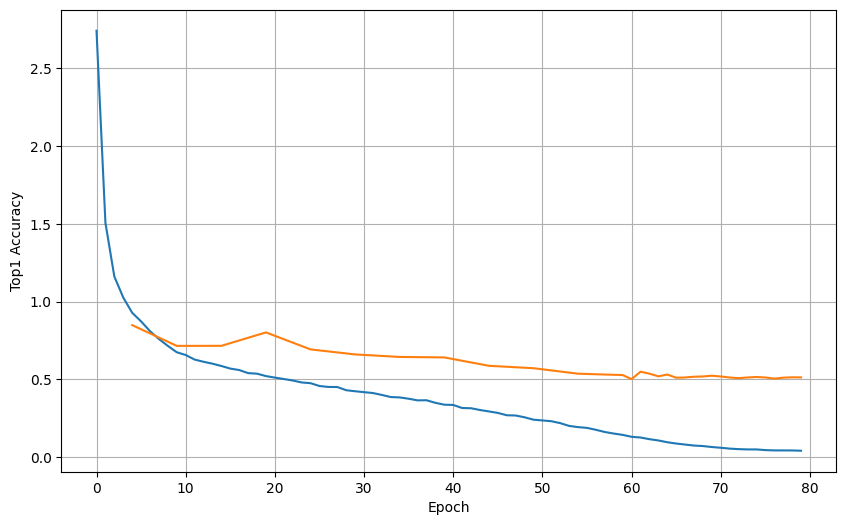

In [45]:
plot_losses("logs/norm_tests/xsub_joints_relative/training.log")

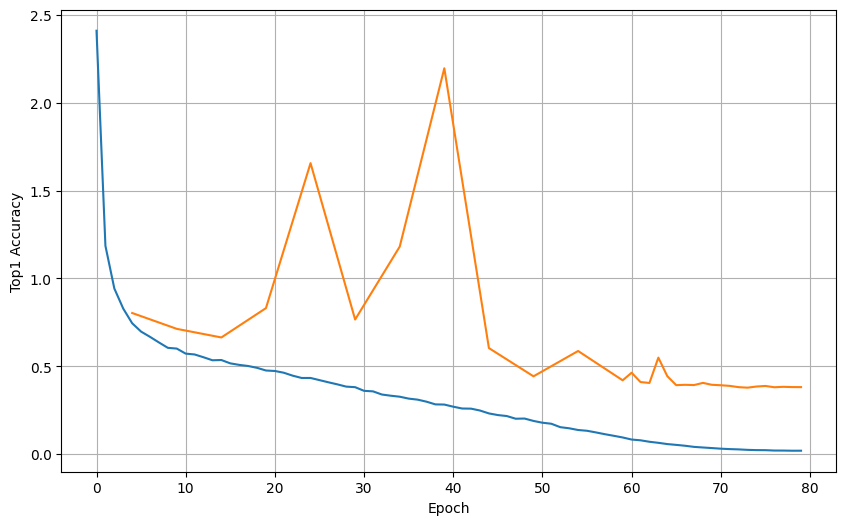

In [46]:
plot_losses("logs/norm_tests/xsub_joints_screen/training.log")

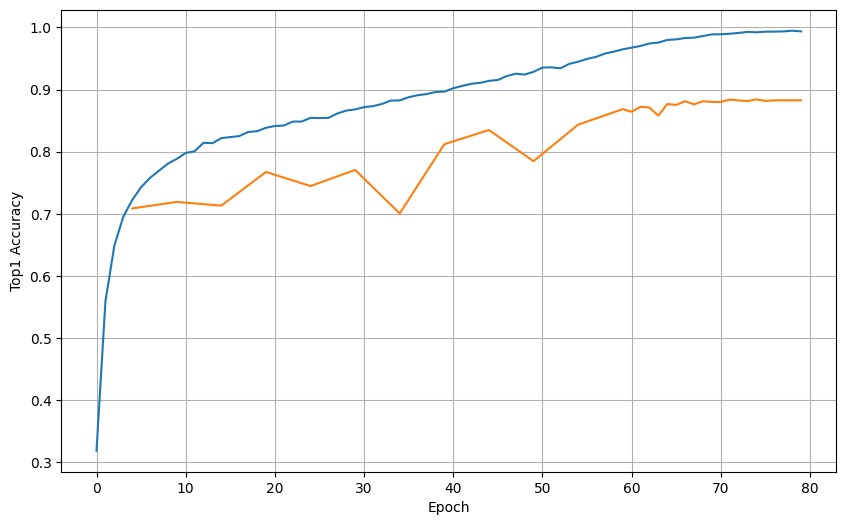

In [32]:
plot_losses("logs/norm_tests/xsub_joints_mean_spine/training.log")